In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

In [ ]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
print("error before gradient descent:",hyp.error(x,y))
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error before gradient descent: 2937.6446095153397
error after gradient descent: 0.03937321303112907


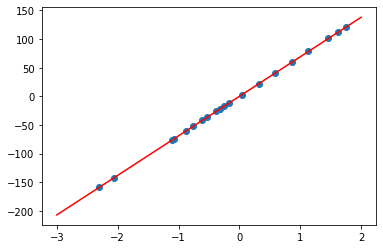

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

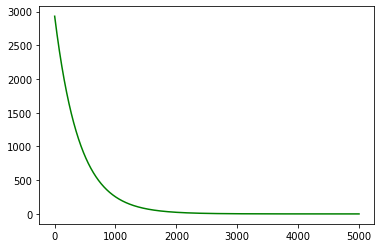

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [ ]:
hyp = Model(0.05, 3)
print("error before gradient descent:",hyp.error(x,y))
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error before gradient descent: 2688.8560165959952
error after gradient descent: 0.0359380551213085


In [ ]:
hyp = Model(-10000, 5000)
print("error before gradient descent:",hyp.error(x,y))
steps, errors = hyp.fit(x, y, 0.01)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error before gradient descent: 71496284.20776717
error after gradient descent: 2.0059226588479422e-25


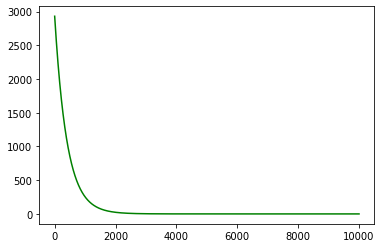

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
hyp = Model(0.05, 3)
print("error before gradient descent:",hyp.error(x,y))
steps, errors = hyp.fit(x, y, 0.1)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error before gradient descent: 2688.8560165959952
error after gradient descent: 1.658624426653096e-27


In [ ]:
hyp = Model(0.05, 3)
print("error before gradient descent:",hyp.error(x,y))
steps, errors = hyp.fit(x, y, 0.3)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error before gradient descent: 2688.8560165959952
error after gradient descent: 7.885157785749778e-29


Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X, col="0"):
        if isinstance(X, pd.DataFrame):
          X = X[col]
        return self.b0 + self.b1 * X
    def error(self, X, Y, col="0"):
        if isinstance(X, pd.DataFrame):
          X = X[col]
          Y = Y[col]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000, col="0"):
        if isinstance(X, pd.DataFrame):
          X = X[col]
          Y = Y[col]
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
x_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)
y_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)

In [ ]:
hyp = Model()
print("error before gradient descent:",hyp.error(x_df,y_df))
steps, errors = hyp.fit(x_df, y_df)
J = hyp.error(x_df, y_df)
print("error after gradient descent:", J)

error before gradient descent: 2937.6446095153397
error after gradient descent: 0.03937321303112907


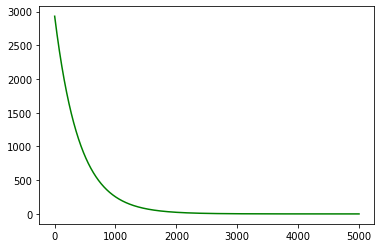

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=10000, coef = 0.000001):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            if step != 0:
              if np.absolute(errors[-1] - new_err) < coef:
                break
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [ ]:
hyp = Model()
print("error before gradient descent:",hyp.error(x,y))
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error before gradient descent: 2937.6446095153397
error after gradient descent: 0.0005244076717215663


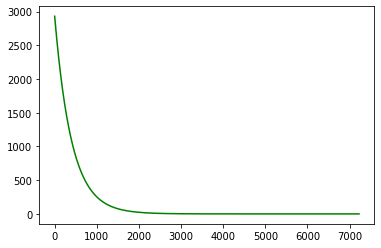

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.9, accuracy=0.01, max_steps=10000, coef = 0.000001):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            if step != 0:
              if errors[-1] - new_err < coef:
                break
              if errors[-1] < new_err:
                alpha /= 2

            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
print("error before gradient descent:",hyp.error(x,y))
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error before gradient descent: 2937.6446095153397
error after gradient descent: 2.0259253069378044e-08


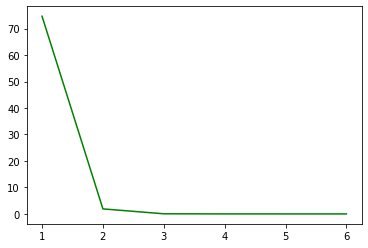

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def draw(self, steps, errors):
      plt.figure()
      plt.plot(steps, errors, 'g')
      plt.show()
    def fit(self, X, Y, alpha=0.9, accuracy=0.01, max_steps=10000, coef = 0.000001):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            if step != 0:
              if errors[-1] - new_err < coef:
                break
              if errors[-1] < new_err:
                alpha /= 2

            step += 1
            steps.append(step)
            errors.append(new_err)
        self.draw(steps, errors)
        return steps, errors

error before gradient descent: 2937.6446095153397


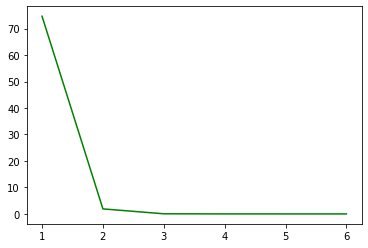

error after gradient descent: 2.0259253069378044e-08


In [ ]:
hyp = Model()
print("error before gradient descent:",hyp.error(x,y))
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)